In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # StandardScaler
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt

# 设计思路 v1.0
神经网络构建线性回归的逻辑：
1. 初始化线性回归方程，使用随机参数（数量与输入特征一致）以便后续迭代优化。
2. 利用输入特征，基于初始化的方程计算预测结果
3. 计算损失函数（回归：均方误差/分类：交叉熵），评估预测值与真实值偏差
4. 基于梯度 * 学习率逐步优化参数，并重新进行步骤2、3
5. 重复步骤4，直到损失函数值收敛

In [12]:
class NetWork(object):
    def __init__(self,num_nodes):
        np.random.seed(0)
        self.w = np.random.randn(num_nodes,1) # narray
        self.b = np.array([[0]])       
# 前向计算
    def forward(self,x):
        z = np.dot(x,self.w) + self.b
        return z
# 损失函数
    def loss(self,x,y):
        z = self.forward(x)
        cost = np.mean((z - y)**2)
        return cost
# 梯度下降
    def gradientDescent(self,x,y,eta):
        gap = self.forward(x) - y
        gradient_w = np.mean(gap * x,axis=0)
        gradient_w = gradient_w[:,np.newaxis] # 转成 n*1的narray
        gradient_b = np.mean(gap,axis=0)
        self.w = self.w - eta * gradient_w
        self.b = self.b - eta * gradient_b
# 训练模型
    def train(self,x,y,iterations=100,eta=0.01):
        losses = []
        step = iterations/5
        for i in range(iterations):
            l = self.loss(x,y)
            self.gradientDescent(x,y,eta)
            if (i+1)%step == 0:
                print('iterations: %s,loss: %s.' % (i+1,l))
            losses.append(l)
        plot_x = np.arange(len(losses))
        plot_y = np.array(losses)
        plt.plot(plot_x, plot_y)
        plt.show() # 画出损失函数的变化趋势
        return self.w,self.b,losses
# 预测数据
    def predict(self,x,y):
        z = self.forward(x)
        print(r2_score(y,z))
        return z

# 设计思路 v2.0
基于 **设计思路v1.0** 优化步骤4中 **梯度下降** 的计算，大数据集全量计算的性能不高，梯度下降每次都有学习率控制，只下降一点点，所以大体方向准确的话,单词训练可以使用小样本计算加速迭代，同时打乱原数据顺序防止对结尾数据过拟合，形成 **随机梯度下降**过程。

In [39]:
class NetWork2(object):
    def __init__(self,num_nodes):
        np.random.seed(0)
        self.w = np.random.randn(num_nodes,1) # narray
        self.b = np.array([[0]])       
# 前向计算
    def forward(self,x):
        z = np.dot(x,self.w) + self.b
        return z
# 损失函数
    def loss(self,x,y):
        z = self.forward(x)
        cost = np.mean((z - y)**2)
        return cost
# 梯度下降
    def gradientDescent(self,x,y,eta):
        gap = self.forward(x) - y
        gradient_w = np.mean(gap * x,axis=0)
        gradient_w = gradient_w[:,np.newaxis] # 转成 n*1的narray
        gradient_b = np.mean(gap,axis=0)
        self.w = self.w - eta * gradient_w
        self.b = self.b - eta * gradient_b
# 训练模型
    def train(self,x,y,num_epochs,batch_size,eta=0.01):
        losses = []
        data = np.append(x,y,axis=1)
        for epoch_id in range(num_epochs):
            np.random.shuffle(data)
            mini_batches = [data[i:i+batch_size] for i in range(0,len(x),batch_size)]
            for mini_batch in mini_batches:
                x_batch,y_batch = np.split(mini_batch, [-1], axis=1)
                l = self.loss(x_batch,y_batch)
                self.gradientDescent(x_batch,y_batch,eta)
                losses.append(l) 
            print('Epoch {:3d}, loss_last = {:.4f}'.format(epoch_id,l))
        plot_x = np.arange(len(losses))
        plot_y = np.array(losses)
        plt.plot(plot_x, plot_y)
        plt.show()
        return self.w,self.b,losses
# 预测数据
    def predict(self,x,y):
        z = self.forward(x)
        print(r2_score(y,z))
        return z

# 实战验证
## 导入数据

In [4]:
x, y = load_boston(return_X_y=True) # ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV' ]
y = y[:,np.newaxis]

## 划分数据

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=11)

## 归一化

In [6]:
pre_mm = MinMaxScaler()
x_train_pre = pre_mm.fit_transform(x_train) # inverse_transform
x_test_pre = pre_mm.transform(x_test)

# 训练与预测

iterations: 70,loss: 46.88809116569661.
iterations: 140,loss: 37.69788671643564.
iterations: 210,loss: 32.46566915011091.
iterations: 280,loss: 29.192723638885493.
iterations: 350,loss: 27.07662049377755.


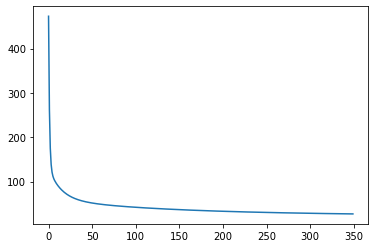

In [46]:
net = NetWork(13)
w,b,losses = net.train(x_train_pre,y_train,iterations=350,eta=0.1)

Epoch   0, loss_last = 95.4529
Epoch   1, loss_last = 4.0923
Epoch   2, loss_last = 11.6994
Epoch   3, loss_last = 9.2706
Epoch   4, loss_last = 11.6116
Epoch   5, loss_last = 15.4811
Epoch   6, loss_last = 4.0572
Epoch   7, loss_last = 36.2199
Epoch   8, loss_last = 10.1292
Epoch   9, loss_last = 1.9317


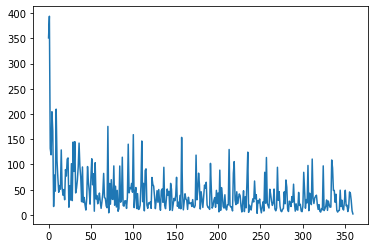

In [45]:
net2 = NetWork2(13)
w,b,losses = net2.train(x_train_pre,y_train,num_epochs=10,batch_size=10,eta=0.1)

In [47]:
z = net.predict(x_test_pre,y_test)

0.6572832638199209


In [48]:
z = net2.predict(x_test_pre,y_test)

0.6628166077728521


随机梯度下降加快了训练过程，但是对于规律性比较强的数据，梯度下降比随机梯度下降效果要好。
# 高阶挑战
用代码实现两层的神经网络的梯度传播，中间层的尺寸为13